<a href="https://colab.research.google.com/github/pgallino/TP2-DATOS-1C2023-MachineLearning-/blob/main/TP2_Gr%C3%A1ficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importaciones y librerias

In [ ]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import squarify as squarify

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/secondary_data.csv')
df.head(10)

,class,capdiameter-,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
5,p,15.34,x,g,o,f,e,NaN,w,17.84,...,s,y,w,u,w,t,p,NaN,d,u
6,p,14.85,f,h,o,f,e,NaN,w,17.71,...,s,y,w,u,w,t,g,NaN,d,w
7,p,14.86,x,h,e,f,e,NaN,w,17.03,...,s,y,w,u,w,t,p,NaN,d,u
8,p,12.85,f,g,o,f,e,NaN,w,17.27,...,s,y,w,u,w,t,p,NaN,d,a
9,p,13.55,f,g,e,f,e,NaN,w,16.04,...,s,y,w,u,w,t,p,NaN,d,w


# **TRABAJO PRÁCTICO 2 - ANÁLISIS EXPLORATORIO**

🟧 *VISUALIZACIÓN DE DATOS* 🟧

## 🟪 ANALIZO EL ANCHO Y ALTURA DEL TALLO CON BARPLOTS Y BOXPLOTS 🟪

In [ ]:
(df.loc[df['class'] == 'e']).mean()

capdiameter-                   7.80
stem-height                    7.04
stem-width                    14.36
suma                           1.00
dtype: float64

In [ ]:
(df.loc[df['class'] == 'p']).mean()

capdiameter-                   5.88
stem-height                    6.21
stem-width                    10.38
suma                           1.00
dtype: float64

In [ ]:
df_height = df.loc[df['stem-height'] < 10]

Text(0, 0.5, 'Altura del tallo (cm)')

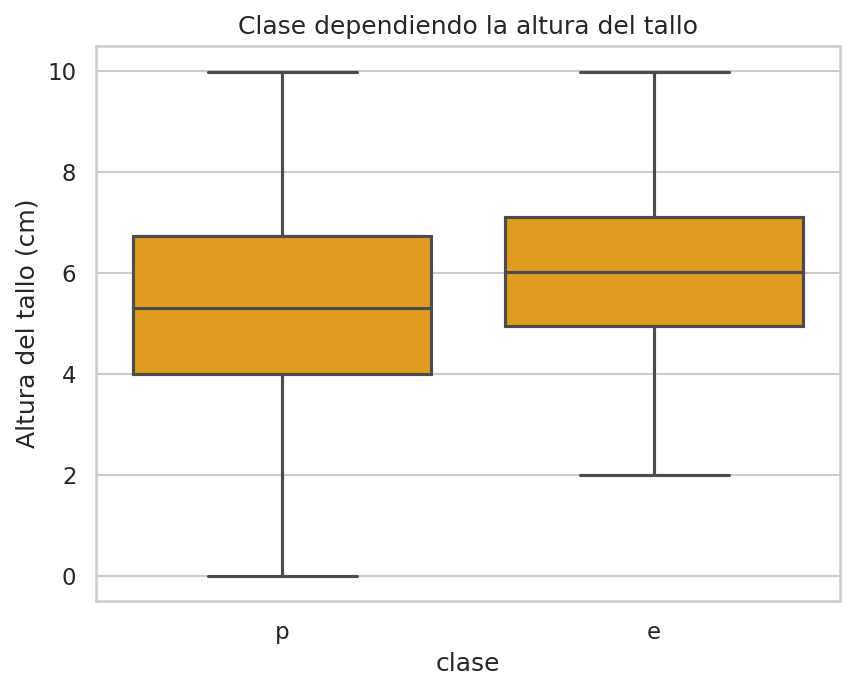

In [ ]:
plt.figure(dpi=150)
sns.boxplot(data=df_height, x='class', y='stem-height', color='orange')
plt.title("Clase dependiendo la altura del tallo")
plt.xlabel("clase")
plt.ylabel("Altura del tallo (cm)")

Text(0, 0.5, 'Altura del tallo (cm)')

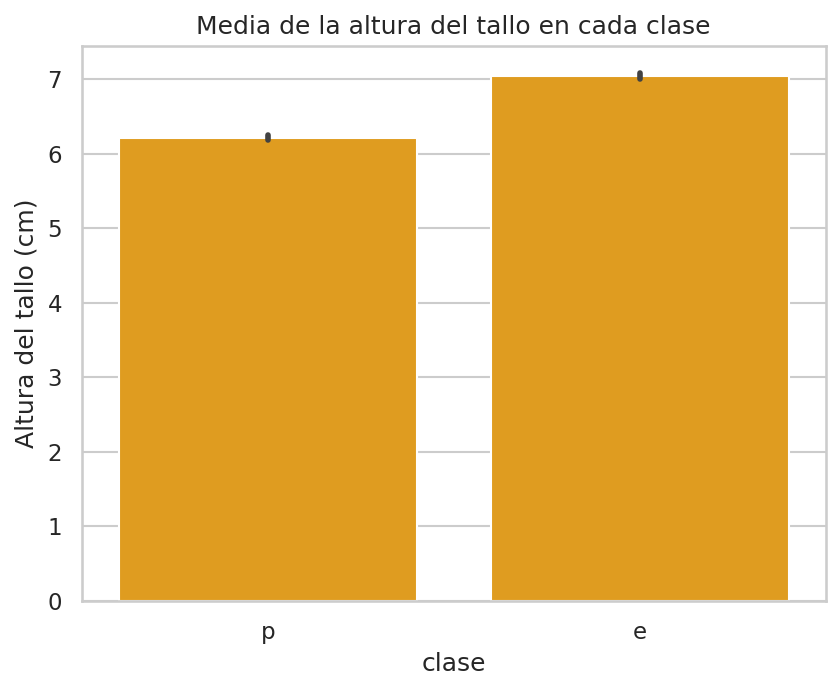

In [ ]:
plt.figure(dpi=150)
plt.title("Media de la altura del tallo en cada clase")
sns.barplot(data=df, x='class', y='stem-height', color='orange')
plt.xlabel("clase")
plt.ylabel("Altura del tallo (cm)")

In [ ]:
df_width = df.loc[df['stem-width'] < 45]

Text(0, 0.5, 'Ancho del tallo (mm)')

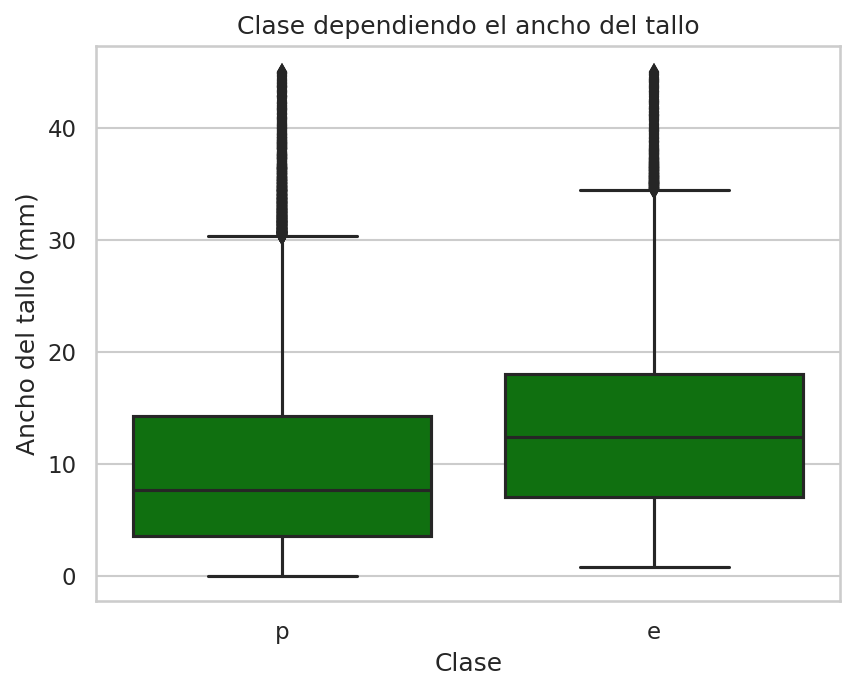

In [ ]:
plt.figure(dpi=150)
sns.boxplot(data=df_width, x='class', y='stem-width', color='green')
plt.title("Clase dependiendo el ancho del tallo")
plt.xlabel("Clase")
plt.ylabel("Ancho del tallo (mm)")

Text(0, 0.5, 'Ancho del tallo (mm)')

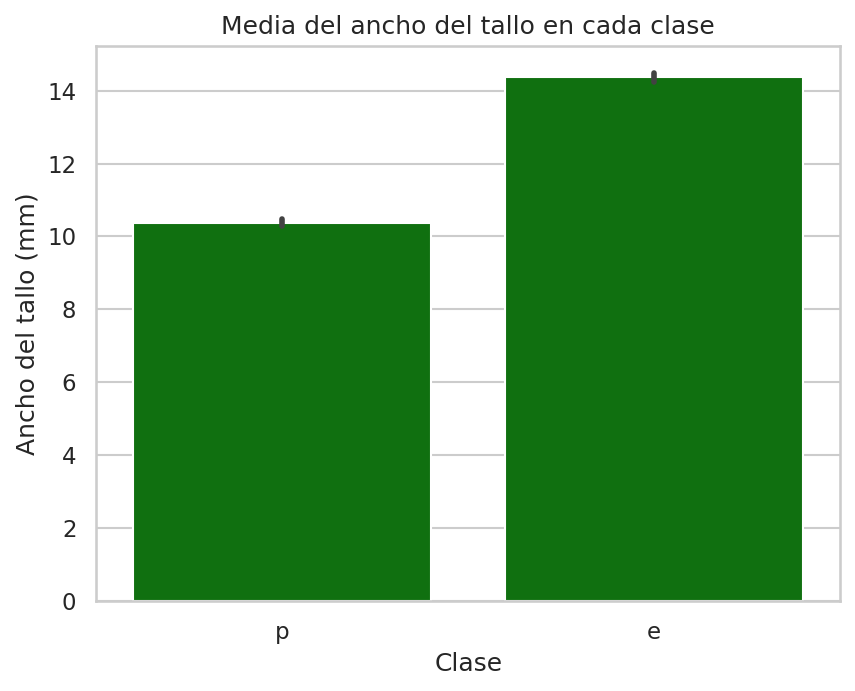

In [ ]:
plt.figure(dpi=150)
plt.title("Media del ancho del tallo en cada clase")
sns.barplot(data=df, x='class', y='stem-width', color='green')
plt.xlabel("Clase")
plt.ylabel("Ancho del tallo (mm)")

🟦 Puedo ver que en general el ancho y alto del tallo, es mayor en los hogos comestibles. Por lo tanto, puedo pensar que en general, los hongos comestibles son los más "grandes".

## 🟪 ANALIZO EL DIÁMETRO DE LA "CABEZA" O "TAPA" CON VIOLINPLOT Y BOXPLOT 🟪

In [ ]:
df_capdiam = df.loc[df['capdiameter-'] < 22]

Text(0, 0.5, 'Diámetro de la tapa (cm)')

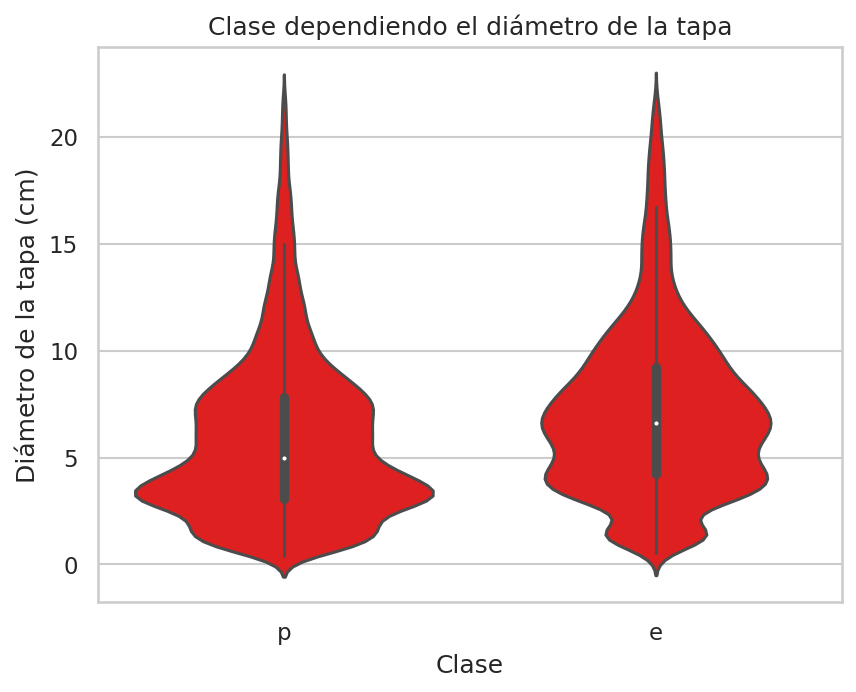

In [ ]:
plt.figure(dpi=150)
sns.violinplot(data=df_capdiam, x='class', y='capdiameter-', color='red')
plt.title("Clase dependiendo el diámetro de la tapa")
plt.xlabel("Clase")
plt.ylabel("Diámetro de la tapa (cm)")

Text(0, 0.5, 'Diámetro de la tapa (cm)')

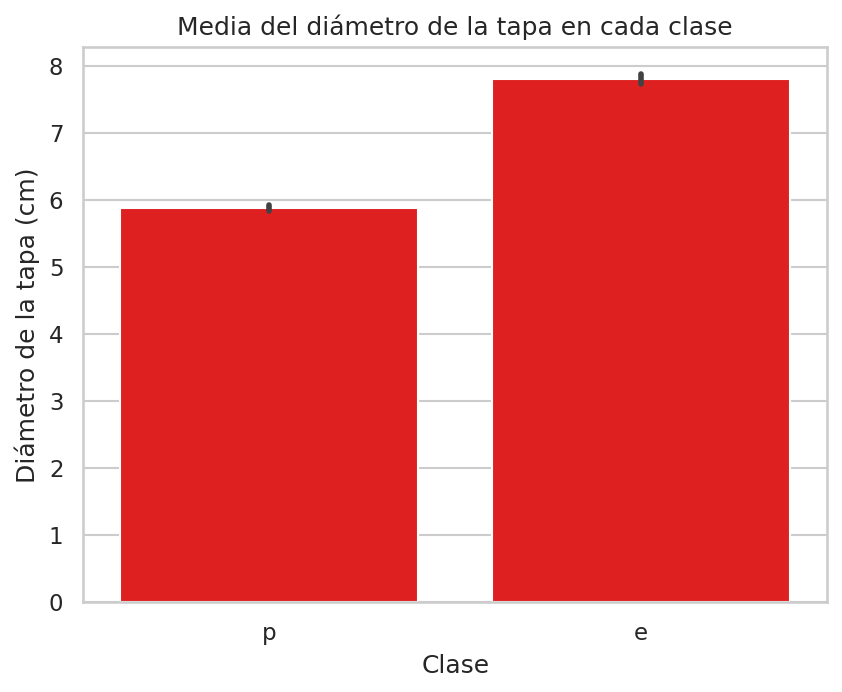

In [ ]:
plt.figure(dpi=150)
plt.title("Media del diámetro de la tapa en cada clase")
sns.barplot(data=df, x='class', y='capdiameter-', color='red')
plt.xlabel("Clase")
plt.ylabel("Diámetro de la tapa (cm)")

🟦 Puedo ver que en general el diametro de la tapa, es mayor en los hogos comestibles. Por lo tanto, puedo pensar que en general, los hongos comestibles son los más "cabezones".

## 🟪 ANALIZO LOS DISTINTAS VARIABLES CON HEATMAPS 🟪

In [ ]:
df['suma'] = 1

Text(505.6750000000001, 0.5, 'Forma')

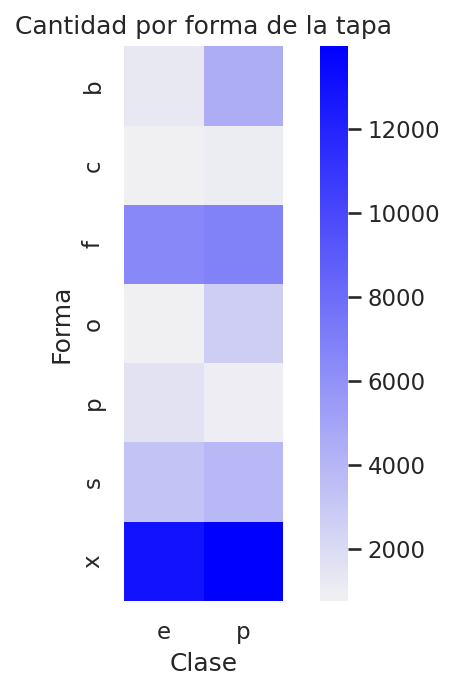

In [ ]:
matriz = df.pivot_table(values='suma', index='cap-shape', columns='class', aggfunc='count').fillna(0)
plt.figure(dpi=150)
plt.title("Cantidad por forma de la tapa")
sns.heatmap(matriz, square=True, cmap=sns.light_palette("blue", as_cmap=True))
plt.xlabel("Clase")
plt.ylabel("Forma")

Text(68.875, 0.5, 'Clase')

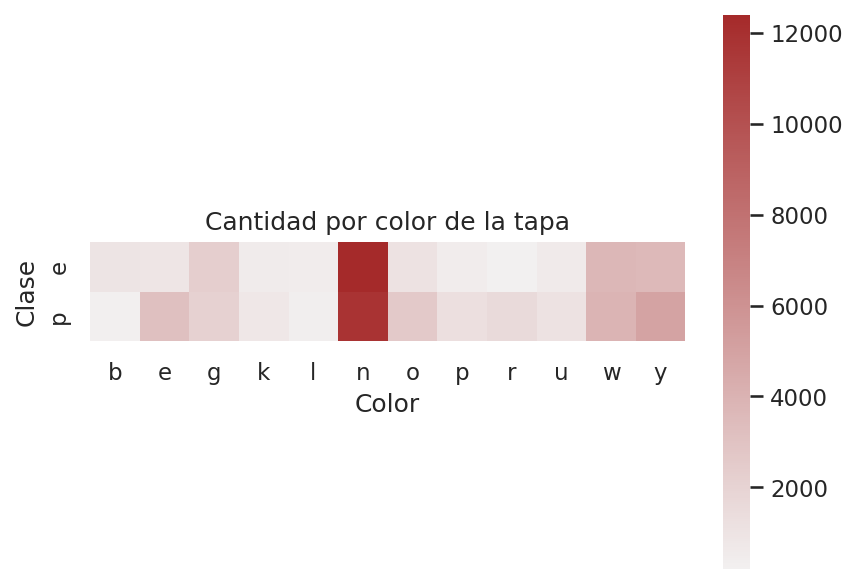

In [ ]:
matriz = df.pivot_table(values='suma', index='class', columns='cap-color', aggfunc='count').fillna(0)
plt.figure(dpi=150)
plt.title("Cantidad por color de la tapa")
sns.heatmap(matriz, square=True, cmap=sns.light_palette("brown", as_cmap=True))
plt.xlabel("Color")
plt.ylabel("Clase")

🟦 No parecen decir mucho, no hay alguna forma o color que dependiendo de la clase del hongo resalte mucho en cantidad de venenosos o comestibles. Puedo ver que hay más venenosos que comestibles en ciertas formas o colores, pero es poca la diferencia.

Text(68.875, 0.5, 'Clase')

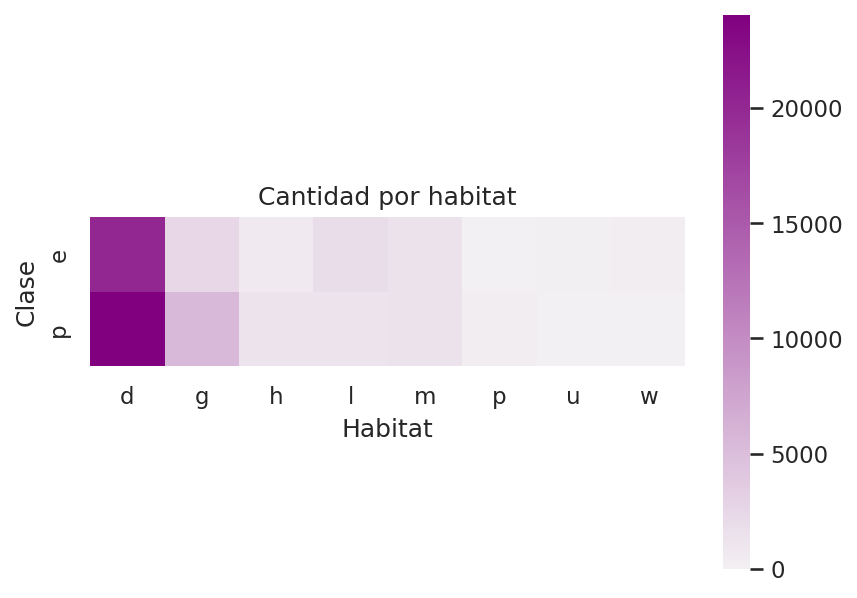

In [ ]:
matriz = df.pivot_table(values='suma', index='class', columns='habitat', aggfunc='count').fillna(0)
plt.figure(dpi=150)
plt.title("Cantidad por habitat")
sns.heatmap(matriz, square=True, cmap=sns.light_palette("purple", as_cmap=True))
plt.xlabel("Habitat")
plt.ylabel("Clase")

🟦 No parece decir mucho, no hay algun habitat que dependiendo de la clase del hongo resalte mucho en cantidad de venenosos o comestibles. Tal vez solo puedo decir que hay más venenosos que comestibles en los habitat "d", "g" y "h". Lo contrario puedo decir con "m" e "i".

Text(68.875, 0.5, 'Clase')

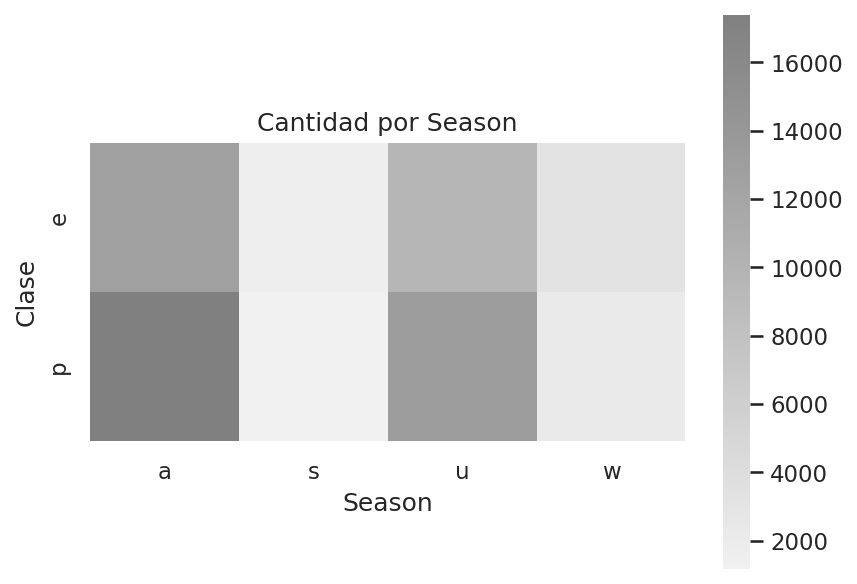

In [ ]:
matriz = df.pivot_table(values='suma', index='class', columns='season', aggfunc='count').fillna(0)
plt.figure(dpi=150)
plt.title("Cantidad por Season")
sns.heatmap(matriz, square=True, cmap=sns.light_palette("grey", as_cmap=True))
plt.xlabel("Season")
plt.ylabel("Clase")

🟦 Puedo ver que en general en "a" y "u" suelen ser más venenosos que comestibles. Lo contrario para "s" y "w" 

## 🟪 ANALIZO DISTINTAS VARIABLES CON SCATTERS 🟪

In [ ]:
import plotly.express as px

In [ ]:
fig1 = px.scatter(df, x="stem-width", y="stem-height", color="class", labels={
                     "stem-width": "Ancho del tallo (mm)",
                     "stem-height": "Altura del tallo (cm)",
                     "class": "Clase" }, title="clase dependiendo ancho y altura del tallo" )
fig1.show()

🟦 En los valores de ancho y alto bajos, ambas clases se distribuyen de forma parecida. Luego, en valores altos de ancho y alto, solo llegan los hongos comestibles.

In [ ]:
fig2 = px.scatter(df, x="stem-width", y="capdiameter-", color="class", labels={
                     "stem-width": "Ancho del tallo (mm)",
                     "capdiameter-": "Diametro de la tapa (cm)",
                     "class": "Clase" }, title="clase dependiendo ancho y diametro de la tapa" )
fig2.show()

🟦 Puedo observar que los hongos venenosos predominan la zona de diametro bajo-medio y la zona media de ancho. Luego los hongos comestibles predominan en los extremos aproximadamente.